In [97]:
import cv2
from datetime import datetime
import os
import numpy as np
from scipy.ndimage import convolve
import matplotlib.pyplot as plt
from scipy import ndimage
import skimage.color as sc
import numpy as np
import skimage
from scipy.ndimage import gaussian_filter as gauss


img = ''
sigma = 5 # 1, 3, 5, 10, 20
kernel_size = 3 

roi_img = np.zeros_like(img)

def gaussBlur( img):
        return cv2.GaussianBlur(img,(3,3), sigmaX=0, sigmaY=0)
    
def Sobel( img):
        sobelx_img = cv2.Sobel(gaussBlur(img), ddepth=cv2.CV_64F, dx=1, dy=0, ksize=3)
        sobelx_img = np.uint8(np.absolute(sobelx_img))
        return sobelx_img

def Laplaciano(img):
        laplacian_img = cv2.Laplacian(gaussBlur(img), ddepth=cv2.CV_64F, ksize=3)
        return laplacian_img

def Canny(img):
        canny_img = cv2.Canny(img, threshold1=300, threshold2=500)
        return canny_img


def pipeline(img):
        gauss_blur = gaussBlur(img)
        canny_filter = Canny(gauss_blur)
        img_mask = RoiFilter(canny_filter)
        # return img_mask
        return canny_filter
    
def displayImage( img):
        fig = plt.figure(figsize=(12,10))
        ax = fig.add_subplot(111)
        ax.imshow(img, cmap='gray')

def RoiFilter(img):
        roi_img = np.zeros_like(img)
        roi_img1 = cv2.fillPoly(roi_img, vertices, 255)
        roi_mask = cv2.bitwise_and(img, roi_img1)
        return roi_mask

def Erosion(img):
        kernel = np.ones((3,3),np.uint8)
        erosion = cv2.dilate(img, kernel, 4)
        return erosion

def Hough(img):
        rho = 1
        theta = np.pi/200
        threshold = 1
        min_line_len = 1
        max_line_gap = 1
        img_maks = pipeline(img)
        lines = cv2.HoughLinesP(img_maks, rho, theta, threshold,
                                        np.array([]), minLineLength=min_line_len,
                                        maxLineGap=max_line_gap)
        img_lines = np.zeros((img_maks.shape[0], img_maks.shape[1], 3), dtype=np.uint8)
        for line in lines:
                for x1,y1,x2,y2 in line:
                        cv2.line(img_lines, (x1, y1), (x2, y2), [255, 0, 0], 2)
        
        print(lines)
        return img_lines
        # return lines


In [98]:
# buscar la ruta de la imagen
img = cv2.imread('D:\Dron\cyberdrone-vision\drone_image.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
rgb_image = cv2.cvtColor(img_gray, cv2.COLOR_BGR2RGB)
img_arr = np.asarray(img_gray)

#displayImage(Canny(img_gray))

()

()

In [99]:
img_arr.shape

(144, 256)

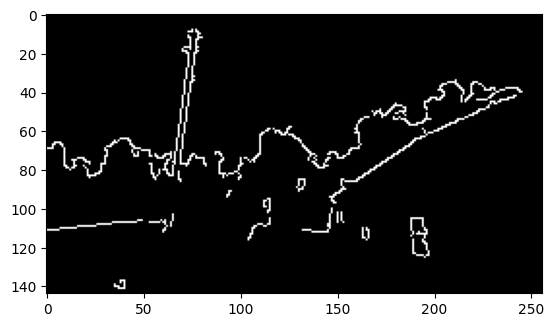

In [100]:
vertices =np.array([[(0,64),(0,37),(110,37),(120,64)]], dtype=np.int64)
roi_img = np.zeros_like(img_gray)
erosion = Erosion(img_gray)
gauss_img = gaussBlur(img_gray)
#gauss_img = gaussBlur(erosion)
canny_img = Canny(gauss_img)
#sobel_img = Sobel(canny_img)


cv2.fillPoly(roi_img, vertices, 255)
img_mask = cv2.bitwise_and(canny_img, roi_img)
plt.imshow(canny_img, cmap='gray')
# 


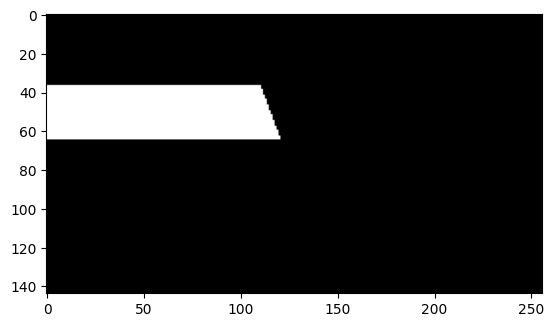

In [101]:
plt.imshow(roi_img, cmap='gray')

[[[191  66 191  63]]

 [[  8  79   8  70]]

 [[186  54 186  48]]

 ...

 [[194 119 195 119]]

 [[ 28 109  28 107]]

 [[193 118 194 118]]]


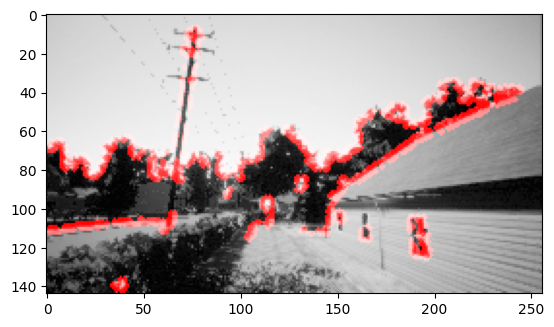

In [102]:

alpha = 1
beta = 2
gamma = 3
img_lane_lines = cv2.addWeighted(rgb_image, alpha, Hough(canny_img), beta, gamma)
plt.imshow(img_lane_lines)